# Exploring Dandiset 000673: Control of working memory by phase–amplitude coupling of human hippocampal neurons

This notebook was AI-generated using dandi-notebook-gen and has not been fully verified.
Use caution when interpreting the code or results.

This notebook demonstrates how to explore and analyze Dandiset 000673, which contains data related to the
control of working memory by phase–amplitude coupling of human hippocampal neurons.

The dataset includes electrophysiological recordings and behavior from the Sternberg task performed in patients
with intractable epilepsy implanted with depth electrodes and Behnke-Fried microwires in the human medial temporal
lobe and medial frontal cortex.

Before using this notebook, make sure you have the following packages installed:
```bash
pip install lindi pynwb matplotlib seaborn dandi
```

In [1]:
from dandi.dandiapi import DandiAPIClient
client = DandiAPIClient()
dandiset = client.get_dandiset("000673")
assets = list(dandiset.get_assets())
print(f"Number of assets in the dandiset: {len(assets)}")
for asset in assets:
    print(asset.path)

Number of assets in the dandiset: 44
sub-11/sub-11_ses-1_ecephys+image.nwb
sub-12/sub-12_ses-1_ecephys+image.nwb
sub-1/sub-1_ses-1_ecephys+image.nwb
sub-1/sub-1_ses-2_ecephys+image.nwb
sub-10/sub-10_ses-1_ecephys+image.nwb
sub-12/sub-12_ses-2_ecephys+image.nwb
sub-14/sub-14_ses-1_ecephys+image.nwb
sub-13/sub-13_ses-1_ecephys+image.nwb
sub-15/sub-15_ses-1_ecephys+image.nwb
sub-16/sub-16_ses-1_ecephys+image.nwb
sub-18/sub-18_ses-1_ecephys+image.nwb
sub-17/sub-17_ses-1_ecephys+image.nwb
sub-2/sub-2_ses-1_ecephys+image.nwb
sub-19/sub-19_ses-2_ecephys+image.nwb
sub-19/sub-19_ses-1_ecephys+image.nwb
sub-20/sub-20_ses-1_ecephys+image.nwb
sub-22/sub-22_ses-1_ecephys+image.nwb
sub-22/sub-22_ses-2_ecephys+image.nwb
sub-22/sub-22_ses-3_ecephys+image.nwb
sub-21/sub-21_ses-1_ecephys+image.nwb
sub-23/sub-23_ses-1_ecephys+image.nwb
sub-25/sub-25_ses-1_ecephys+image.nwb
sub-24/sub-24_ses-1_ecephys+image.nwb
sub-26/sub-26_ses-1_ecephys+image.nwb
sub-27/sub-27_ses-1_ecephys+image.nwb
sub-26/sub-26_ses-2

The Dandiset contains the following files, according to DANDI API:

In [2]:
# [markdown]
# ## Accessing data in NWB file
#
# This section demonstrates how to access data in an NWB file within this Dandiset.
# The example NWB file we will use is `sub-1/sub-1_ses-1_ecephys+image.nwb`.
#
# The following code shows how to access data in this particular NWB file using `lindi` and `pynwb`.
# These are Python libraries that can be installed using pip.

In [3]:
import pynwb
import lindi

# Load the NWB file
f = lindi.LindiH5pyFile.from_lindi_file("https://lindi.neurosift.org/dandi/dandisets/000673/assets/65a7e913-45c7-48db-bf19-b9f5e910110a/nwb.lindi.json")
nwb = pynwb.NWBHDF5IO(file=f, mode='r').read()

# Print some basic information about the NWB file
print(f"Session description: {nwb.session_description}")  # SBCAT_ID: 1
print(f"Identifier: {nwb.identifier}")  # sub-1_ses-1_P55CS
print(f"Session start time: {nwb.session_start_time}")
print(f"Experiment description: {nwb.experiment_description}")
print(f"Institution: {nwb.institution}")
print(f"Lab: {nwb.lab}")

/opt/conda/lib/python3.11/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'hdmf-common' version 1.5.0 because version 1.8.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."
/opt/conda/lib/python3.11/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'core' version 2.6.0-alpha because version 2.7.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."
/opt/conda/lib/python3.11/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'hdmf-experimental' version 0.1.0 because version 0.5.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."


Session description: SBCAT_ID: 1
Identifier: sub-1_ses-1_P55CS
Session start time: 2018-01-01 00:00:00-08:00
Experiment description: This data contains electrophysiological recordings and behavior from the Sternberg task performed in patients with intractable epilepsy implanted with depth electrodes and Behnke-Fried microwires in the human medial temporal lobe and medial frontal cortex.
Institution: Cedars-Sinai Medical Center
Lab: Rutishauser


## Exploring LFP data

This section demonstrates how to access and visualize LFP data from the NWB file.

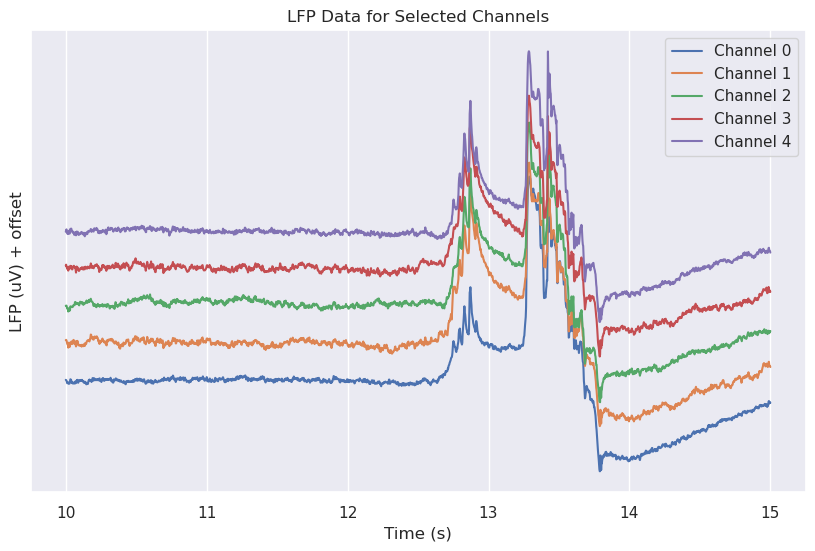

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

# LFP data
LFPs = nwb.acquisition["LFPs"]
lfp_data = LFPs.data
lfp_rate = LFPs.rate
electrodes = LFPs.electrodes

# Select a subset of channels and time
channel_ids = [0, 1, 2, 3, 4]
start_time = 10  # seconds
end_time = 15  # seconds

# Find the indices corresponding to the start and end times
start_index = int(start_time * lfp_rate)
end_index = int(end_time * lfp_rate)

# Extract LFP data for selected channels and time window
lfp_subset = lfp_data[start_index:end_index, channel_ids]

# Time vector for plotting
time_vector = np.linspace(start_time, end_time, lfp_subset.shape[0])

# Create the LFP plot
plt.figure(figsize=(10, 6))
for i, channel_id in enumerate(channel_ids):
    plt.plot(time_vector, lfp_subset[:, i] + i * 100, label=f"Channel {channel_id}")  # Add offset for readability

plt.xlabel("Time (s)")
plt.ylabel("LFP (uV) + offset")
plt.title("LFP Data for Selected Channels")
plt.yticks([])  # Remove y-axis ticks
plt.legend()
plt.savefig("lfp_plot.png")  # Save the plot to a file
plt.show()

The LFP plot shows the LFP data for five channels over a time period from 10 to 15 seconds.  The LFP signals appear relatively stable (low amplitude fluctuations) before 12.5s. A pronounced, transient event occurs around the 13-14 second mark: each channel shows a sharp increase in voltage followed by a sharp dip that goes well below the original baseline. After the dip, the signals for all the channels continue to increase. The signals on the different shown channels appear to be offset vertically for clarity.

## Exploring Trial Structure

This section demonstrates how to access and visualize the trial structure from the NWB file.

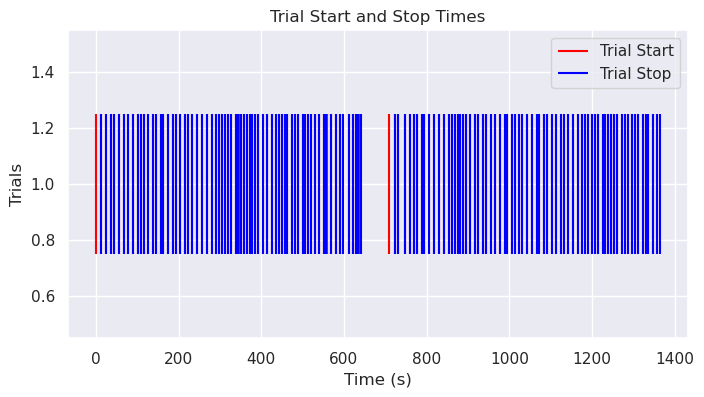

In [5]:
# Trials data
trials = nwb.intervals["trials"]
trial_start_times = trials["start_time"][:]
trial_stop_times = trials["stop_time"][:]
loads = trials["loads"][:]

# Create the trials plot
plt.figure(figsize=(8, 4))
plt.eventplot(trial_start_times, colors='red', label='Trial Start', linelengths=0.5)
plt.eventplot(trial_stop_times, colors='blue', label='Trial Stop', linelengths=0.5)
plt.xlabel("Time (s)")
plt.ylabel("Trials")
plt.title("Trial Start and Stop Times")
plt.legend()
plt.savefig("trials_plot.png")  # Save the plot to a file
plt.show()

The trials plot shows trial start and stop times over a period approaching 1400 seconds. Trial starts are indicated by red vertical lines, and trial stops are indicated by blue vertical lines. The trials appear to be approximately the same length, and there is a break of about 100 seconds around the 700-second mark, with no trials occurring during that time. The trial starts and stops occur frequently. Other than this break, the trials seem to occur at a consistent rate throughout the shown time period.

## Exploring Trial Loads

This section demonstrates how to access and visualize the trial loads from the NWB file.

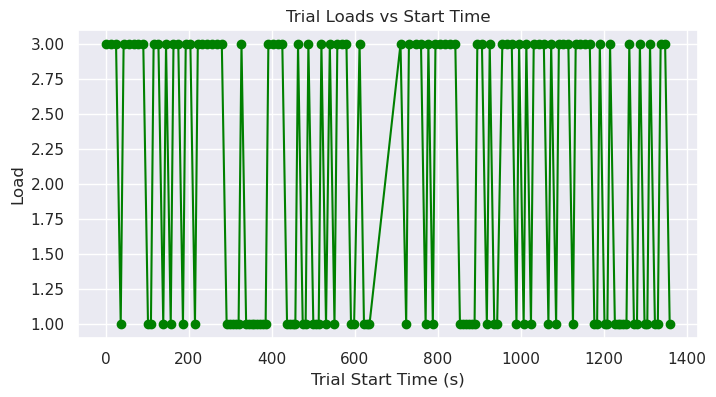

In [6]:
# loads plot
plt.figure(figsize=(8,4))
plt.plot(trial_start_times, loads, marker='o', linestyle='-', color='green')
plt.xlabel("Trial Start Time (s)")
plt.ylabel("Load")
plt.title("Trial Loads vs Start Time")
plt.savefig("loads_plot.png")  # Save the plot to a file
plt.show()


The plot shows trial loads plotted against trial start times. The loads oscillate between 1 and 3. There doesn't appear to be any clear trends or direct relationships between the trial start time and the trial load. The pattern observed seems to be random.